# Day_059

### 練習時間
#### 用 digits (3 個數字即可 , dataset.load_digits(n_class = 3)) 資料嘗試跑 PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [2]:
digits = datasets.load_digits(n_class = 3)
df_digits = pd.DataFrame(digits.data)
X = digits.data
y = digits.target
print(df_digits.shape)
df_digits.head()

(537, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0
4,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0


In [3]:
pd.Series(y).value_counts()

1    182
0    178
2    177
dtype: int64

In [4]:
# 秀出資料欄位的類型與數量
dtype_df = df_digits.dtypes.reset_index() # 重置 index 值
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,float64,64


In [5]:
# 設定模型估計參數
centers = [[1, 1], [-1, -1], [1, -1]]
#pca = decomposition.PCA(n_components = 3) 

In [6]:
# n_components 降維後的維度數量 
estimators = [(decomposition.PCA(n_components = 3)),
              (decomposition.PCA(n_components = 5))]

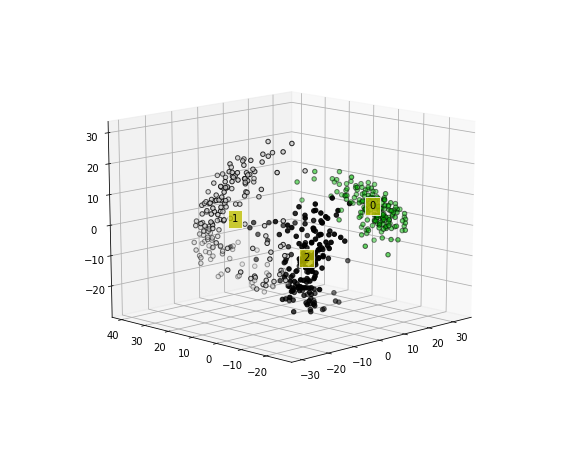

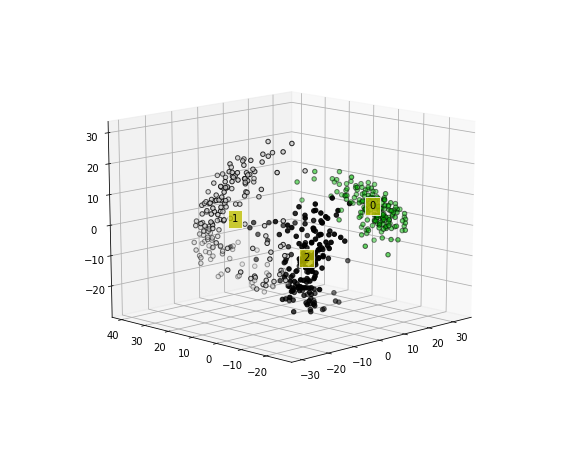

In [9]:
fignum = 1
titles = ['dimention_3', 'dimention_5']
for pca in estimators:
    X = digits.data
    y = digits.target
    pca.fit(X)
    X = pca.transform(X)
    fig = plt.figure(1, figsize = (8, 6))
    plt.clf()
    ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 15, azim = 225)
    #ax.view_init(elev = 15, azim = 225)  
    ax.dist = 12
    plt.cla()
    
    for name, label in [('0', 0), ('1', 1), ('2', 2)]:
        ax.text3D(X[y == label, 0].mean(),
                  X[y == label, 1].mean(),
                  X[y == label, 2].mean(), name,
                  horizontalalignment = 'center',
                  bbox = dict(alpha = .8, edgecolor = 'w', facecolor = 'y'))
   
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(np.float)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = y, cmap = plt.cm.nipy_spectral, edgecolor = 'k')
    ax.set_title(titles[fignum - 1])
    fignum = fignum + 1
    
    plt.show()    

降成 3 維度和 5 維度的結果沒什麼差別